# Import library

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Make Dataset

In [4]:
X,y = make_regression(n_samples=117, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

In [5]:
X.shape, y.shape

((117, 1), (117,))

In [6]:
y

array([  44.63980822,  -22.82454848,   68.47511156,   33.52511798,
        -28.14531311,  -63.41039906,  -50.86935248,  -32.65202522,
        -12.72480914,  123.40113772,   26.25112269,   90.39842372,
        155.26423247,   86.61713976,   22.16859198,  -27.55930038,
         -5.82404943,   72.24670797,   92.51734481,  -59.22219799,
         67.59888047, -120.03110064,   37.00149925,   69.30288749,
        -65.49299086, -182.88830765,  -50.48456012,   19.00526447,
         35.82651056,  189.14999069,  161.25403958,  110.63338116,
       -110.34437988,  -53.98524981,   78.82657335,  -43.92913324,
        -49.30083951,  -88.46466465, -118.20124239,  190.81050214,
        119.37275554,   62.048432  ,  -34.83452245,   54.21758888,
         20.79504909,   18.37842385, -177.65476919,  129.82646732,
        -71.28110101,    1.31827664,  -83.15809501, -134.39321506,
       -165.28487629,   52.15830828,  -68.28791088,   -2.71770299,
        -13.50256158,   76.12664305,   53.35855155,   72.78571

#See the plot of data

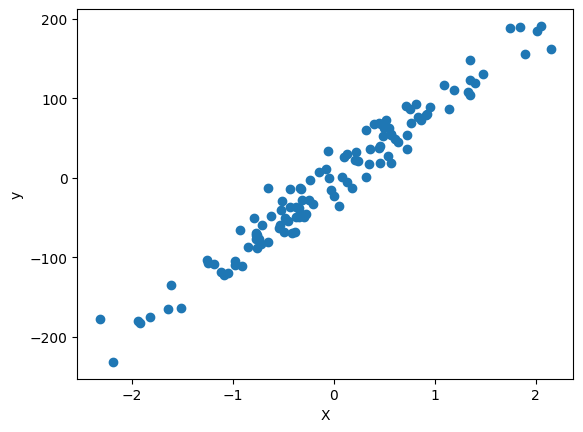

In [7]:
plt.scatter(X,y)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

# Train test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Linear Regression

In [9]:
reg = LinearRegression()

In [10]:
reg.fit(X_train, y_train)

LinearRegression()

# Check coefficiant and intercept

In [11]:
reg.coef_

array([92.81075463])

In [12]:
reg.intercept_

-2.772820173865112

# Check R2 Score

In [13]:
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.9542024151813019

# Make Custom Regression using Gradient Descent

## When `M=92.81(Constant)` then Algorithm

In [14]:
class CustomGDRegressor:
  def __init__(self, lr, epochs) -> None:
    self.m = 92.81
    self.c = 0

    self.coef_ = self.m
    self.intercept_ = self.c

    self.lr = lr
    self.epochs = epochs

  def fit(self, X, y):

    for i in range(self.epochs):
      loss_slop_c = -2*np.sum(y-X.ravel()*self.m-self.c)

      self.c = self.c - (self.lr * loss_slop_c)
      print(loss_slop_c, self.c)

  def predict(self, X):
    return X*self.m + self.c

In [15]:
reg2 = CustomGDRegressor(0.0001, 1000)
reg2.fit(X_train, y_train)
reg2.c

515.7524959426676 -0.05157524959426676
506.1594995181338 -0.10219119954608014
496.74493282709665 -0.1518656928287898
487.50547707651265 -0.2006162405364411
478.4378752028895 -0.24846002805673004
469.53893072411563 -0.2954139211291416
460.80550661264704 -0.3414944717904063
452.234524189652 -0.3867179242093715
443.8229620397246 -0.43110022041334395
435.56785494578537 -0.4746570059079225
427.4662928437942 -0.5174036351923019
419.51541979689944 -0.5593551771719919
411.71243298867705 -0.6005264204708596
404.05458173508765 -0.6409318786443683
396.53916651481484 -0.6805857952958497
389.1635380176393 -0.7195021490976137
381.9250962105112 -0.7576946587186648
374.82128942099587 -0.7951767876607644
367.84961343776536 -0.8319617490045409
361.0076106278229 -0.8680625100673232
354.29286907014557 -0.9034917969743377
347.7030217054409 -0.9382620991448818
341.2357455017195 -0.9723856736950538
334.8887606353876 -1.0058745497585926
328.65982968756936 -1.0387405327273496
322.54675685538047 -1.070995208412

-2.7728628619593945

In [16]:
r2_score(y_test, reg2.predict(X_test))

0.9542021502704775

### Check LinearRegression value and Gradient Descent Value

In [17]:
reg.intercept_, reg2.c

(-2.772820173865112, -2.7728628619593945)

# Full Custome GD Regression
Geadient Descent: dL/dL\` = `δL/δc` and `δL/δm`
1. $\frac {δL}{δc} $= -2 $\sum_{i=1}^{n}(y_i - mx_i -c)$

2. $\frac {δL}{δm} $= -2 $\sum_{i=1}^{n} x_i(y_i - mx_i -c)$

<!-- $^3/_7$ -->
<!-- $\frac{\frac{x}{1}}{x - y}$ -->
<!-- $\binom{n}{k}$ -->
<!-- $\frac{n!}{k!(n-k)!}$ -->


In [19]:
class FullGDRegression:
  def __init__(self, lr, epochs) -> None:
    self.m = 1
    self.c = 0

    self.coef_ = self.m
    self.intercept_ = self.c

    self.lr = lr
    self.epochs = epochs

  def fit(self, X, y):

    for i in range(self.epochs):
      # loss_slope = -2 sum (y-mx-c)
      loss_slope_c = -2 * np.sum(y - self.m *X.ravel()- self.c)
      loss_slope_m = -2 * np.sum(X.ravel() * (y - self.m*X.ravel() - self.c))

      # update m and c
      self.c = self.c - (self.lr * loss_slope_c)
      self.m = self.m - (self.lr * loss_slope_m)
      # print(loss_slope, c)
      print(self.m, self.c)

  def predict(self, X):
    return X*self.m + self.c

In [37]:
reg3 = FullGDRegression(0.01, 500)
reg3.fit(X_train, y_train)
reg3.c, reg3.m

154.68564755531105 -14.821919841165897
50.03918090431448 14.102676409365912
123.27663123873083 -21.788104039481986
70.37380634051684 16.78731950643968
109.91957068691552 -21.95636938280729
79.31548012913788 15.525994506709296
103.78907709100261 -19.93038310821146
83.6408377831847 13.138318885103487
100.63645971767218 -17.421672582578708
86.0195682647134 10.648967042220676
98.77885965363865 -15.030432538918067
87.51728696606449 8.396960025746875
97.53719147954894 -12.936048897173833
88.57061435475072 6.465085687502306
96.62730218595952 -11.163758283961155
89.36749245785973 4.845136112694519
95.9222637103125 -9.686718143896613
89.99588516984586 3.500665600130608
95.35923689945129 -8.464325640010932
90.50221656583119 2.390140936134646
94.90271032506188 -7.455975370573091
90.91458063733907 1.4749033588249532
94.529770231295 -6.625463481686213
91.25215802736155 0.7214055335392384
94.22401963808748 -5.9419202119740016
91.52919669011665 0.10137343466719173
93.97292531305024 -5.37953008614702


(-2.7728201738651075, 92.81075462796159)

# Justify Orginal Regression and Custome Regression

In [38]:
reg.coef_, reg3.m

(array([92.81075463]), 92.81075462796159)

In [39]:
reg.intercept_, reg3.c

(-2.772820173865112, -2.7728201738651075)

# R2 score check

In [40]:
r2_score(y_test, reg3.predict(X_test))

0.9542024151813019